In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/UCPP.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310510 entries, 0 to 310509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        310510 non-null  object 
 1   year          310510 non-null  int64  
 2   manufacturer  310510 non-null  object 
 3   model         310463 non-null  object 
 4   condition     310510 non-null  object 
 5   cylinders     310510 non-null  int64  
 6   odometer      310510 non-null  float64
 7   title_status  310510 non-null  object 
 8   transmission  310510 non-null  object 
 9   drive         310510 non-null  object 
 10  type          310510 non-null  object 
 11  paint_color   310510 non-null  object 
 12  state         310510 non-null  object 
 13  price         310510 non-null  int64  
 14  fuel          310510 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 35.5+ MB


In [29]:
df

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,rwd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590,gas
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


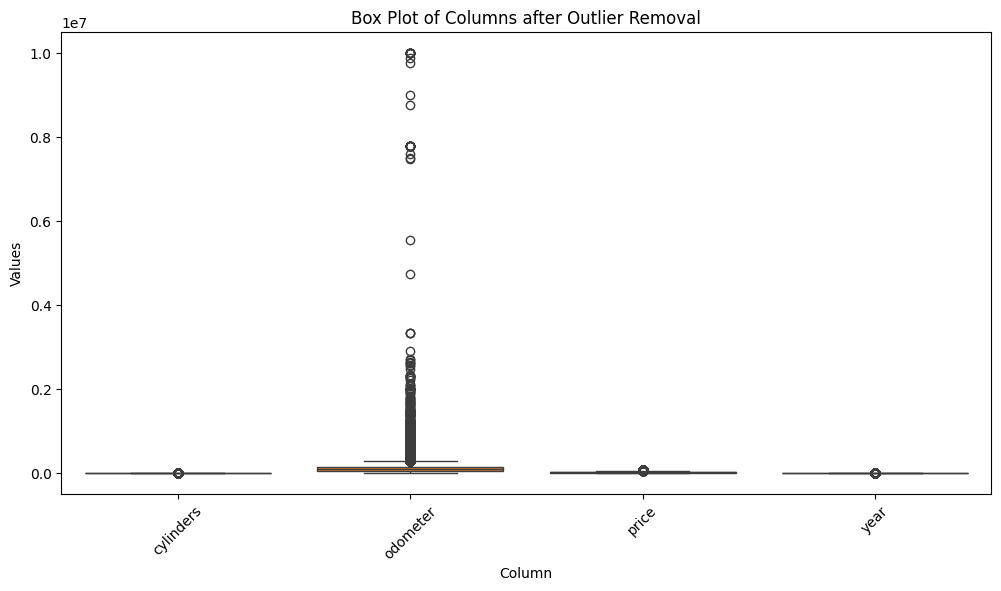

In [30]:
#boxplot before cleaning
columns_for_boxplot = ['cylinders', 'odometer', 'price','year']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_for_boxplot])
plt.title('Box Plot of Columns after Outlier Removal')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [31]:
columns_to_check = ['cylinders', 'odometer', 'price','year']

#function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df.loc[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df_out

# Loop through columns and remove outliers
for column in columns_to_check:
    df = remove_outliers(df, column)

In [32]:
df

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,rwd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590,gas
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


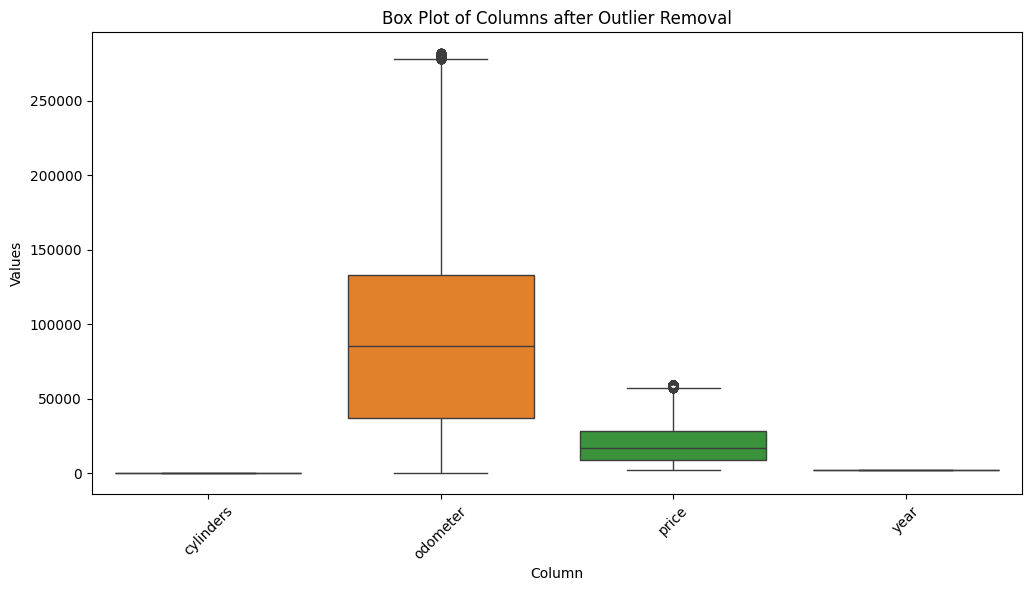

In [33]:
columns_for_boxplot = ['cylinders', 'odometer', 'price','year']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_for_boxplot])
plt.title('Box Plot of Columns after Outlier Removal')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()